In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
# Loading excel file to assign labels to images

data_df = pd.read_csv('driver_imgs_list.csv')

# Image folder path
images_folder = 'limited_dataset'

In [3]:
# Mapping the classname codes to to full names

class_mapping = {
    'c0' : 'Safe driving',
    'c1' : 'Texting - right',
    'c2' : 'Talking on the phone - right',
    'c3' : 'Texting - left',
    'c4' : 'Talking on the phone - left',
    'c5' : 'Operating the radio',
    'c6' : 'Drinking', 
    'c7' : 'Reaching behind',
    'c8' : 'Hair and makeup',
    'c9' : 'Talking to passenger'
}

data_df['classname'] = data_df['classname'].map(class_mapping)

In [4]:
# Preprocess the images and split the dataset

np.random.seed(333)

datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.2)

img_height = 180
img_width = 180
batch_size = 8

train_ds = datagen.flow_from_dataframe(
    dataframe = data_df,
    directory = images_folder,
    x_col = 'img',
    y_col = 'classname',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    subset = 'training'
)

valid_ds = datagen.flow_from_dataframe(
    dataframe = data_df,
    directory = images_folder,
    x_col = 'img',
    y_col = 'classname',
    target_size = (img_height, img_width),
    batch_size = batch_size,
    subset = 'validation'
)

Found 160 validated image filenames belonging to 10 classes.


c:\Users\brian\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 22224 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  warnings.warn(


Found 40 validated image filenames belonging to 10 classes.


c:\Users\brian\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 22224 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  warnings.warn(


In [5]:
num_classes = len(train_ds.class_indices)

## Model 1
First model attempt with minimal data preprocessing

In [6]:
 # First model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(num_classes)
])

In [7]:
model_1.compile(optimizer = 'adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
              )

In [8]:
epochs = 10
history = model_1.fit(
    train_ds,
    validation_data = valid_ds,
    epochs = epochs
)

Epoch 1/10
20/20 [==============================] - 2s 99ms/step - loss: 10.6549 - accuracy: 0.1187 - val_loss: 2.3168 - val_accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 1s 52ms/step - loss: 2.2970 - accuracy: 0.1000 - val_loss: 2.3370 - val_accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 1s 53ms/step - loss: 2.7112 - accuracy: 0.1063 - val_loss: 2.3570 - val_accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 1s 54ms/step - loss: 2.2877 - accuracy: 0.0750 - val_loss: 2.3752 - val_accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 1s 53ms/step - loss: 2.2835 - accuracy: 0.1125 - val_loss: 2.3930 - val_accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 1s 54ms/step - loss: 2.2795 - accuracy: 0.1250 - val_loss: 2.4110 - val_accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 1s 53ms/step - loss: 2.2756 - accuracy: 0.1250 - val_loss: 2.4289 - val_accur

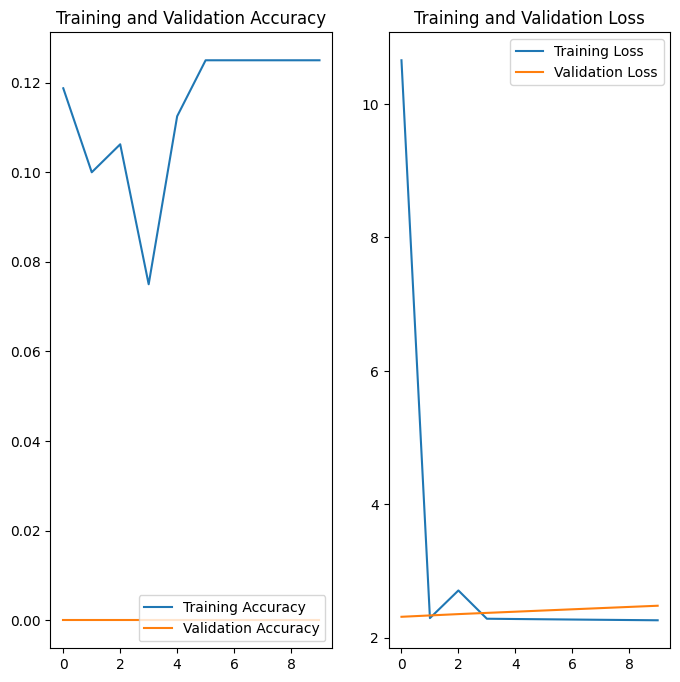

In [9]:
# Visualize training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

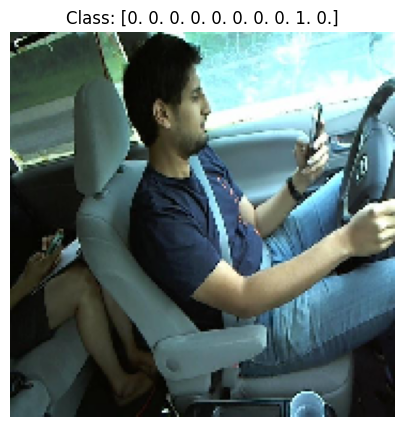

In [10]:
# Get a batch of images
images, labels = next(train_ds)

# Display the first image in the batch
plt.figure(figsize=(5, 5))
plt.imshow(images[0])
plt.title(f"Class: {labels[0]}")
plt.axis("off")
plt.show()

## Introducing Data Preproccesing

In [16]:
# Data Augmentation
# Random Flip, random rotation, random zoom

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split = 0.2
)

# Create train and validation datasets
train_ds = datagen.flow_from_dataframe(
    dataframe=data_df,
    directory=images_folder,
    x_col='img',
    y_col='classname',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training'
)

val_ds = datagen.flow_from_dataframe(
    dataframe=data_df,
    directory=images_folder,
    x_col='img',
    y_col='classname',
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation'
)

# Print class indices
print(train_ds.class_indices)

Found 160 validated image filenames belonging to 10 classes.


c:\Users\brian\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 22224 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  warnings.warn(


Found 40 validated image filenames belonging to 10 classes.
{'Drinking': 0, 'Hair and makeup': 1, 'Operating the radio': 2, 'Reaching behind': 3, 'Safe driving': 4, 'Talking on the phone - left': 5, 'Talking on the phone - right': 6, 'Talking to passenger': 7, 'Texting - left': 8, 'Texting - right': 9}


c:\Users\brian\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\preprocessing\image.py:1139: UserWarning: Found 22224 invalid image filename(s) in x_col="img". These filename(s) will be ignored.
  warnings.warn(


In [18]:
 # Second model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation = 'relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(num_classes)
])

In [19]:
model_2.compile(optimizer = 'adam',
              loss = tf.keras.losses.CategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy']
              )

In [20]:
epochs = 10
history = model_2.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
20/20 [==============================] - 2s 94ms/step - loss: 10.3664 - accuracy: 0.0812 - val_loss: 2.3153 - val_accuracy: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 2s 88ms/step - loss: 2.2972 - accuracy: 0.1375 - val_loss: 2.3359 - val_accuracy: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 2s 87ms/step - loss: 2.2923 - accuracy: 0.1250 - val_loss: 2.3565 - val_accuracy: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 2s 87ms/step - loss: 2.2876 - accuracy: 0.1250 - val_loss: 2.3765 - val_accuracy: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 2s 86ms/step - loss: 2.2830 - accuracy: 0.1250 - val_loss: 2.3960 - val_accuracy: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 2s 85ms/step - loss: 2.2788 - accuracy: 0.1250 - val_loss: 2.4154 - val_accuracy: 0.0000e+00
Epoch 7/10
20/20 [==============================] - 2s 87ms/step - loss: 2.2746 - accuracy: 0.1250 - val_loss: 2.4344 - val_accur

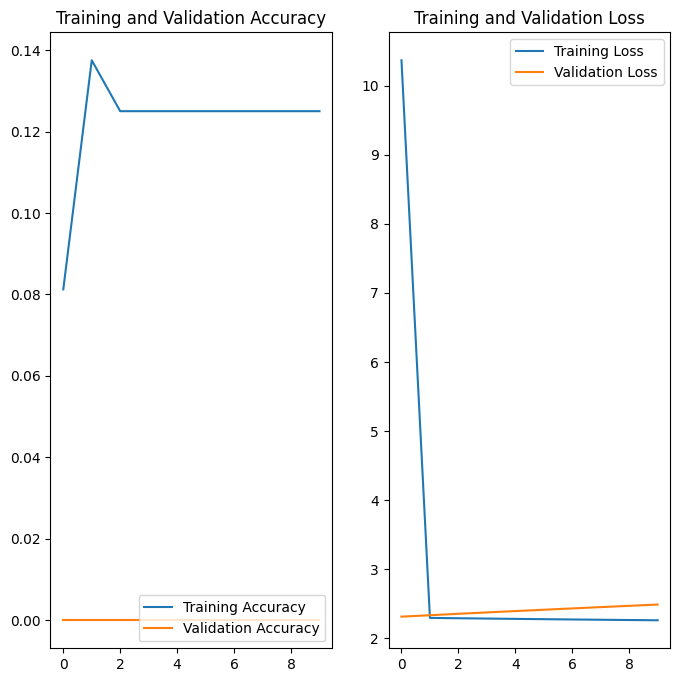

In [21]:
# Visualize training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

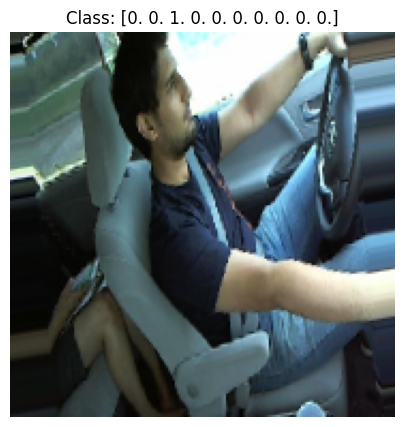

In [22]:
# Get a batch of images
images, labels = next(train_ds)

# Display the first image in the batch
plt.figure(figsize=(5, 5))
plt.imshow(images[0])
plt.title(f"Class: {labels[0]}")
plt.axis("off")
plt.show()